# Predicting the Sale using machine learning
In this notebook , we will go through an example to learn predict price of bulldozer

# Problem definition
> https://www.kaggle.com/code/rambomind/bulldozer-price-prediction

# Data
# Evaluation
# Features
> Kagggle provides a data Dictionary wotj fratures of the dataset



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#import training and validaiton sets

df= pd.read_csv("data/bluebook-for-bulldozers/Train.csv", low_memory=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

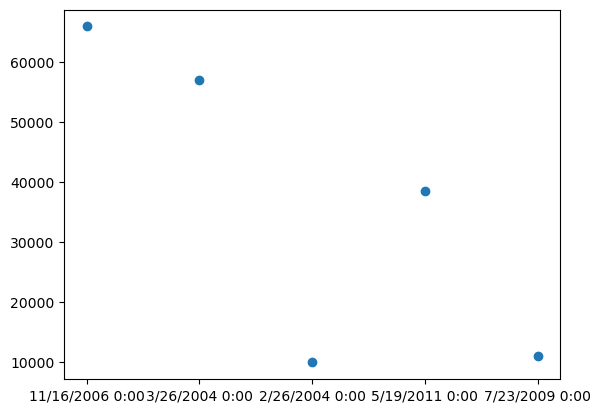

In [210]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:5],df["SalePrice"][:5])

<Axes: ylabel='Frequency'>

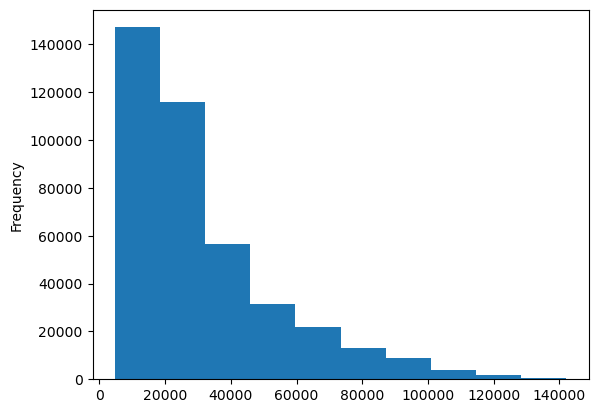

In [211]:
df.SalePrice.plot.hist()

### Parsing Dates 
   

In [4]:
 df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                  low_memory=False,
                 parse_dates=["saledate"])

In [5]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

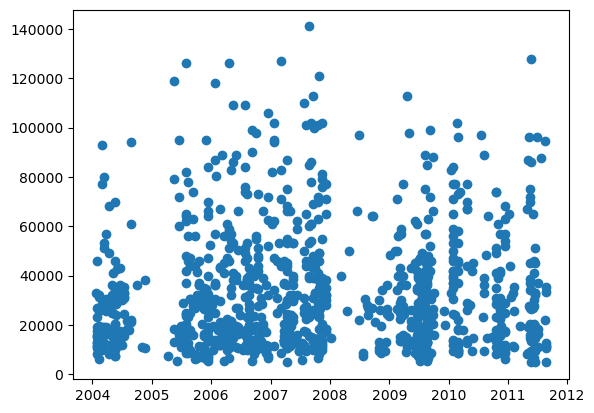

In [214]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
### Sort Dataframe by saleDate

df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [8]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [9]:
df_sortedValues =df.copy()

In [253]:
df_sortedValues.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [10]:
df_new = df.sort_values(by=["MachineID"],inplace=False,ascending=True)
# if inplace is False , then a copy of the data frame is returned and the original df is not modified
#Hence here we see df_new is sorted using the MAchineID values , 
#whilst below when i run the orginal df , I see it is not modified, 
#Equivalent to making a copy as shown 


In [246]:
df_sortedValues.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
df_sortedValues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [11]:
df_sortedValues["saleYear"]= df_sortedValues.saledate.dt.year
df_sortedValues["saleMonth"]= df_sortedValues.saledate.dt.month
df_sortedValues["saleDay"]= df_sortedValues.saledate.dt.day
df_sortedValues["saleDayofWeek"]= df_sortedValues.saledate.dt.day_of_week
df_sortedValues["saleDayofYear"]= df_sortedValues.saledate.dt.day_of_year

In [12]:
 df_sortedValues.saledate = pd.to_datetime(df_sortedValues.saledate)
df_sortedValues[:1].saledate.dt.weekday

205615    1
Name: saledate, dtype: int32

In [14]:
df_sortedValues["saleYear"][:5]

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
Name: saleYear, dtype: int32

In [135]:
df_sortedValues.state.value_counts()

state
Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska  

In [29]:
#random_state=42 acts as np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1 ,
                             random_state=42)
model.fit(X,y)

ValueError: could not convert string to float: 'Low'

In [260]:
df_sortedValues.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [225]:
#Convert Strings to caegories .
df_sortedValues.items()
pd.api.types.is_string_dtype(df_sortedValues["UsageBand"])

False

In [46]:

#for label , content in df_sortedValues.items():
   # if pd.api.types.is_string_dtype(content):
      #  print(f"The {label} is {content.dtype}")
        


    

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [79]:
## Here the code tries to convert all non numeric values into categorical 
##which didnt work as dates got converted to categorical

##for label , content in df_sortedValues.items():
   ## if not pd.api.types.is_numeric_dtype(content):
     ##   df_sortedValues[label] = content.astype("category").cat.as_ordered()

In [15]:
df_sortedValues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [80]:
df_sortedValues.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [16]:
for col in df_sortedValues.select_dtypes(include='object').columns:
   #print(col) // all the columns that are of type object
    df_sortedValues[col] = df_sortedValues[col].astype('category')
   

In [18]:
df_sortedValues_Copy = df_sortedValues.copy()

In [19]:
df_sortedValues_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

In [20]:
for label , content in df_sortedValues.items():
     df_sortedValues_Copy[label] = content.astype("category").cat.as_ordered()

In [67]:
df_sortedValues.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [21]:
df_sortedValues_Copy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [22]:
df_sortedValues.info()


<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

In [207]:
#MAke a new copy 
df_sortedValues_Copy.to_csv("data/bluebook-for-bulldozers/train_tmp2.csv",index=False)


In [197]:
df_sortedValues =pd.read_csv("data/bluebook-for-bulldozers/train_tmp2.csv",low_memory=False)

In [102]:
df_sortedValues_Copy = df_sortedValues.copy()

In [103]:
df_sortedValues_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

In [104]:
for label, content in df_sortedValues_Copy.items():
    if (pd.api.types.is_datetime64_any_dtype(content)):
        print(label)

saledate


In [126]:
##Changing all the non-numeric values to numeric and making all null values codes as 0 
for label, content in df_sortedValues_Copy.items():
    if (not pd.api.types.is_numeric_dtype(content)):
        df_sortedValues_Copy[label+"_missing"] = pd.isnull(content)
        df_sortedValues_Copy[label] = pd.Categorical(content).codes +1
        
   

In [132]:

df_sortedValues_Copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,YearMade,UsageBand,saledate,fiModelDesc,fiBaseModel,...,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,saledate_missing
205615,1646770,9500.0,1126363,8434,132,1974,0,1,4593,1744,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,14000.0,1194089,10150,132,1980,0,2,1820,559,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,50000.0,1473654,4139,132,1978,0,2,2348,713,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,16000.0,1327630,8591,132,1980,0,2,1819,558,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,22000.0,1336053,4089,132,1984,0,2,2119,683,...,True,True,True,True,False,False,False,True,True,False


In [130]:

df_sortedValues_Copy = df_sortedValues_Copy.drop(columns=['MachineHoursCurrentMeter', 'auctioneerID'])

KeyError: "['MachineHoursCurrentMeter', 'auctioneerID'] not found in axis"

In [ ]:
df_sortedValues.saledate

In [113]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
X= df_sortedValues_Copy.drop("SalePrice" ,axis=1)
y= df_sortedValues_Copy["SalePrice"]



In [114]:
df_sortedValues_Copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,saledate_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,0,1,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,0,2,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,0,2,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,0,2,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,0,2,...,True,True,True,True,False,False,False,True,True,False


In [133]:
%%time 
from sklearn.ensemble import RandomForestRegressor
X= df_sortedValues_Copy.drop("SalePrice" ,axis=1)
y= df_sortedValues_Copy["SalePrice"]

model = RandomForestRegressor(n_jobs=-1 ,
                             random_state=42)
model.fit(X,y)

CPU times: total: 55min 33s
Wall time: 7min 48s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [134]:
#score now
df_sortedValues_Copy.score(X,y)


AttributeError: 'DataFrame' object has no attribute 'score'

In [135]:
df_sortedValues_Copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,YearMade,UsageBand,saledate,fiModelDesc,fiBaseModel,...,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,saledate_missing
205615,1646770,9500.0,1126363,8434,132,1974,0,1,4593,1744,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,14000.0,1194089,10150,132,1980,0,2,1820,559,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,50000.0,1473654,4139,132,1978,0,2,2348,713,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,16000.0,1327630,8591,132,1980,0,2,1819,558,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,22000.0,1336053,4089,132,1984,0,2,2119,683,...,True,True,True,True,False,False,False,True,True,False


In [136]:
df_val = df_sortedValues_Copy[df_sortedValues.saleYear == 2012]
df_train = df_sortedValues_Copy[df_sortedValues.saleYear != 2012]

X= df_sortedValues_Copy.drop("SalePrice" ,axis=1)
y= df_sortedValues_Copy["SalePrice"]

X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]
X_valid = df_val.drop("SalePrice",axis=1)
y_valid = df_val["SalePrice"]



In [92]:
len(df_val),len(df_train)
df_sortedValues_Copy.saleYear
df_sortedValues_Copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,YearMade,UsageBand,saledate,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
205615,1646770,9500.0,1126363,8434,132,1974,0,1989-01-17,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,1980,0,1989-01-31,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,1978,0,1989-01-31,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,1980,0,1989-01-31,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,1984,0,1989-01-31,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [121]:
X_train.shape , y_train.shape , X_valid.shape , y_valid.shape

((401125, 57), (401125,), (11573, 57), (11573,))

In [137]:
#Use RMSLE as the kagle competition asks
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """ Calculates root mean squared log error between predictions and true labels"""
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#Create function to evalute the model on different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores ={"Training MAE " : mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_valid,val_preds),
              "Training RmsLE": rmsle(y_train,train_preds),
              "Valid RmsLE": rmsle(y_valid,val_preds),
              "Training R2" : r2_score(y_train,train_preds),
              "Valid R2" : r2_score(y_valid,val_preds)
            }
    return scores

In [139]:
model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42,
                              max_samples=10000)


In [140]:
%%time 
model.fit(X_train,y_train)

CPU times: total: 1min 54s
Wall time: 18.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [141]:
show_scores(model)

{'Training MAE ': 5452.004595400437,
 'Valid MAE': 7235.669558455025,
 'Training RmsLE': 0.2545465962534484,
 'Valid RmsLE': 0.29840100235369166,
 'Training R2': 0.8650830390072773,
 'Valid R2': 0.831835398073276}

In [148]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10], 
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[10000]}


rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state =42),
                                                    param_distributions = rf_grid,
                                                    n_iter=2,
                                                    cv=5,
                                                    verbose=True)

In [149]:
rs_model.fit(X_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [150]:
rs_model.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=10000,
                      min_samples_leaf=3, min_samples_split=4, n_estimators=20,
                      n_jobs=-1, random_state=42)

In [151]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [152]:
show_scores(rs_model)


{'Training MAE ': 8766.110686558903,
 'Valid MAE': 10162.509458545093,
 'Training RmsLE': 0.3857160844953217,
 'Valid RmsLE': 0.40573264768299044,
 'Training R2': 0.6948386874812973,
 'Valid R2': 0.6954779851639689}

In [155]:
## Ideal model with ideal hyperparameters

ideal_model= RandomForestRegressor(n_estimators =40,
                                min_samples_leaf=1,
                                min_samples_split=14,
                                max_features=0.5,
                                n_jobs=-1,
                                max_samples=None)

ideal_model.fit(X_train,y_train)

                                

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [156]:
show_scores(ideal_model)

{'Training MAE ': 2889.323856323084,
 'Valid MAE': 6087.4534348815905,
 'Training RmsLE': 0.14231941121733624,
 'Valid RmsLE': 0.2520052747364867,
 'Training R2': 0.9605262900066325,
 'Valid R2': 0.8790773760486348}

In [298]:
###MAke predictions on test data

df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False,
                      parse_dates=["saledate"])


In [257]:
df_test.saledate

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

In [299]:
def preprocessData(df_test):

    df_test["saleYear"]= df_test.saledate.dt.year
    df_test["saleMonth"]= df_test.saledate.dt.month
    df_test["saleDay"]= df_test.saledate.dt.day
    df_test["saleDayofWeek"]= df_test.saledate.dt.day_of_week
    df_test["saleDayofYear"]= df_test.saledate.dt.day_of_year
    
    
    for label, content in df_test.items():
        if  pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label+"_missing"] = pd.isnull(content)
                df_test[label] = content.fillna(content.median)
        if not pd.api.types.is_numeric_dtype(content):
             df_test[label+"_missing"] =  pd.isnull(content)
             df_test[label] = pd.Categorical(content).codes +1

    return df_test

In [300]:
df_test  = preprocessData(df_test)

In [301]:


df_test_copy = df_test.copy()

In [308]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,YearMade,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1227829,1006309,3168,121,1999,2,3,499,180,25,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,1000,1,9,831,292,0,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,2004,3,9,1177,404,9,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,2006,1,9,287,113,13,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,2005,2,9,566,196,33,...,True,True,True,True,True,False,False,False,True,True


In [287]:
X_train.head()


,SalesID,MachineID,ModelID,datasource,YearMade,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,saledate_missing
205615,1646770,1126363,8434,132,1974,0,1,4593,1744,0,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,1194089,10150,132,1980,0,2,1820,559,0,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,1473654,4139,132,1978,0,2,2348,713,59,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,1327630,8591,132,1980,0,2,1819,558,0,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,1336053,4089,132,1984,0,2,2119,683,21,...,True,True,True,True,False,False,False,True,True,False


In [309]:
set(X_train.columns) - set(df_test.columns)

set()

In [289]:

df_test["MachineHoursCurrentMeter"] = False
df_test["MachineHoursCurrentMeter_missing"] = False
df_test["auctioneerID"] = False

In [304]:

df_test = df_test.drop(columns=['MachineHoursCurrentMeter',
                      'auctioneerID',
                      'MachineHoursCurrentMeter_missing'])

In [291]:
df_test.saledate_missing

0        False
1        False
2        False
3        False
4        False
         ...  
12452    False
12453    False
12454    False
12455    False
12456    False
Name: saledate_missing, Length: 12457, dtype: bool

In [306]:
set(X_train.columns)-set(df_test.columns)


set()

In [310]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
